<a href="https://colab.research.google.com/github/danielgrgurevic/PortafolioDataScience/blob/main/Retail_EDA_Gesti%C3%B3n_de_inventario_Forecasting_ventas_XGBRegressor_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desarrollado por Daniel Grgurevic**



**1- Plan de trabajo**

Para abordar este desafío, mi enfoque primero es verificar la precisión del modelo actual, para ver si ese es el problema.Si el modelo actual es impreciso, procedería a desarrollar un modelo predictivo  de ventas más preciso, mediante la metodología CRISP-DM, para así solucionar el problema de exceso de inventario de la empresa distribuidora agrícola.

**Las tareas escenciales:**

1- Planteamiento problema de negocio: Exceso de inventario producido posiblemente por el modelo actual.

2- Tratamiento de Datos y Preparación de datos. 2 horas
Familiarización rápida con los datos, verificación de la calidad de los datos (valores faltantes, outliers) y limpieza de datos.

3- Exploración y Análisis de Datos. 4 horas.
Análisis exploratorio para entender las tendencias, estacionalidad, y además verificar series de tiempo de ventas y modelo actual. Por otro lado ver la relación entre característias.

4- Desarrollo del modelo. 2 horas.
Desarrollo de varios modelos para comparar métricas claves.

5-Validación, Ajuste y Selección del Modelo. 3 horas.
Validación del modelo utilizando técnicas como la división de tiempo (train-test split) y métricas como el MSE, RMSE, MAE y R2.

6-Comparación con modelo actual, si tiene mejores resultados, medir los potenciales beneficios de la solución. 2 horas.



Para resolver el problema de exceso de inventario a través de una proyección de ventas más precisa, desarrollaría los siguientes elementos específicos.

1- Medición del error del modelo actual
Medir el error primero es fundamental, si existe un error alto procederemos con el siguiente punto.

2-Modelo Predictivo de Ventas:
Prophet:Especializado en series temporales, ideal para datos con patrones estacionales.Fácil de usar y ajustar, robusto frente a valores atípicos.
XGBoost Regressor (XGBR):Alto rendimiento en modelado predictivo con datos complejos.Capaz de capturar relaciones no lineales, esencial para entender patrones de ventas.

**Impacto de solución**

Una forma en que se impactaría positivamente la situación actual de la empresa es la reducción del exceso de inventario, ya que, al mejorar la precisión en la proyección de ventas, la empresa podrá ajustar mejor sus órdenes de compra, evitando acumular inventario innecesario.
Esto conduce a una disminución en los costos asociados con el almacenamiento de exceso de inventario, como costos de almacenaje, deterioro o desperdicio de productos agrícolas.

Una segunda forma de impactar positivamente sería a través de la mejora en la planificación y eficiencia operativa, ya que, con predicciones más precisas, la empresa puede planificar mejor sus compras con el distrubuidor y coordinar de mejor manera entregas y lógistica.
Esto mejora la eficiencia operativa, optimizando recursos.

Finalmente un tercer impacto positivo en la empresa de distrubución agrícola sería, mejorar la calidad de relación con el cliente. Lo anterior es debido a que, asegurando que el inventario esté más alineado con las ventas reales, se reduce el riesgo de escasez de productos, mejorando la satisfacción del cliente.


# 1- Tratamiento de Datos

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data science/Desafío BrainFood/desafio_modelo_de_demanda.csv')
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2017-01-01,0,6651.737920,1786.0,1943.551087
1,2017-02-01,0,4919.698602,2194.0,1853.111850
2,2017-03-01,0,3277.484704,1178.0,1659.733052
3,2017-04-01,0,5906.864332,1010.0,1580.492875
4,2017-05-01,0,4662.644018,1327.0,1552.062093


In [ ]:
df.tail()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
80743,2019-08-01,999,7187.188137,250.0,305.990296
80744,2019-09-01,999,7477.166036,303.0,288.024166
80745,2019-10-01,999,5129.561953,238.0,276.290378
80746,2019-11-01,999,4097.960475,213.0,261.017635
80747,2019-12-01,999,6597.721217,875.0,434.424160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            80748 non-null  object 
 1   prod_id          80748 non-null  int64  
 2   precio_promedio  80748 non-null  float64
 3   ventas           80748 non-null  float64
 4   modelo_actual    80748 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
df['prod_id'] =df['prod_id'].astype(str)

In [ ]:
df.fecha = pd.to_datetime(df.fecha)

In [ ]:
df = df.sort_values(by='fecha')

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            80748 non-null  datetime64[ns]
 1   prod_id          80748 non-null  object        
 2   precio_promedio  80748 non-null  float64       
 3   ventas           80748 non-null  float64       
 4   modelo_actual    80748 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.1+ MB


In [ ]:
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2012-01-01,698,8280.073778,436.0,441.953878
1,2012-01-01,167,1961.219324,1880.0,1960.518724
2,2012-01-01,331,4843.074738,819.0,860.015182
3,2012-01-01,931,12346.697520,1408.0,1351.436692
4,2012-01-01,530,6194.495105,1540.0,1522.800893


In [ ]:
df.tail()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
80743,2023-12-01,771,6005.951252,1890.0,1603.771810
80744,2023-12-01,302,6975.464986,2095.0,640.874562
80745,2023-12-01,434,7644.243310,897.0,1098.486855
80746,2023-12-01,308,2291.913010,1251.0,548.032291
80747,2023-12-01,576,10312.942768,894.0,393.545553


In [ ]:
df_mes = df.resample('M', on='fecha').sum()[['ventas', 'modelo_actual']]

In [ ]:
df_mes.head()

,ventas,modelo_actual
fecha,,
2012-01-31,171115.0,172998.220135
2012-02-29,163879.0,167404.077320
2012-03-31,79903.0,138569.090872
2012-04-30,88810.0,127292.294715
2012-05-31,88917.0,105241.382397


# 2- Exploración y Análisis de Datos

En el siguiente gráfico se observa una estacionalidad anual, también se aprecia un comportamiento autoregresivo, es decir que las curvas, que describen las ventas son similares entre sí en diferentes espacios temporales. Además existe una tendencia alcista hasta el año 2019, luego cambiando la tendencia en este punto de quiebre en una tendencia bajista.

A primera vista también se puede evidenciar un desfase en las predicciones del "Modelo actual", pronosticando menos ventas en los picos y mayores ventas en el retorno a las "ventas bajas", lo cuál podría ser el motivo del exceso de inventario que está teniendo la empresa distribuidora agrícola.

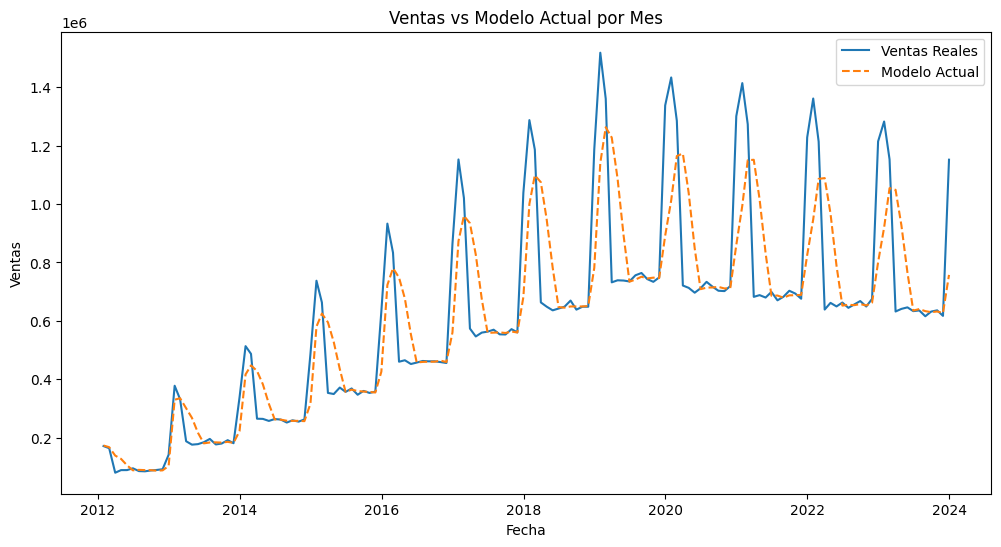

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_mes.index, df_mes['ventas'], label='Ventas Reales')
plt.plot(df_mes.index, df_mes['modelo_actual'], label='Modelo Actual', linestyle='--')
plt.title('Ventas vs Modelo Actual por Mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

En base a los resultados de las métricas se deduce que el modelo_actual tiene una capacidad razonable para capturar la tendencia general de los datos (como lo muestra el R² de 0.7), pero enfrenta dificultades en hacer predicciones precisas a nivel individual, evidenciado por los altos valores de MSE, RMSE y MAE.

In [ ]:
# Métricas para el modelo_actual
mse_actual = mean_squared_error(df_mes['ventas'], df_mes['modelo_actual'])
rmse_actual = np.sqrt(mse_actual)
mae_actual = mean_absolute_error(df_mes['ventas'], df_mes['modelo_actual'])
r2_actual = r2_score(df_mes['ventas'], df_mes['modelo_actual'])

print("MSE modelo actual", mse_actual)
print("RMSE modelo actual", rmse_actual)
print("mae_actual", mae_actual)
print("r2_actual", r2_actual)

MSE modelo actual 34358695653.62017
RMSE modelo actual 185360.98741002695
mae_actual 111550.60005993495
r2_actual 0.7009476358342744


In [ ]:
#Estos datos se ocuparán más adelante para comparar las predicciones de los modelos
df_mes = df_mes.reset_index()
grafico = df_mes[df_mes['fecha'] >= '2021-01-01'][['fecha', 'ventas', 'modelo_actual']]

### Análisis ventas anuales y ventas predichas por "modelo_actual"


En los gráficos de ventas por año se puede evidenciar una clara estacionalidad anual de las ventas.Donde se mantiene un mínimo de las ventas entre los primeros días de abril y diciembre. Luego las ventas comienzan a aumentar agresivamente hasta llegar a su máximo en los días finales de enero, para luego retornar a los mínimos en abril. Esta estacionalidad se repite durante todos los años desde 2012 hasta el 2023.

Por otro lado el modelo no capta muy bien esta estacionalidad, ya que predice los mínimo recién desde julio hasta diciembre.Luego alcanza el máximo en abril, cuyo máximo tampoco se condice con los datos de ventas.
Esto provoca dos efectos negativos en la gestión de inventario de la empresa distribuidora de productos agrícolas entre el año 2013 y 2023.

1- Sobre-stock desde marzo a julio.

2- Falta de Stock entre diciembre y marzo.

* Cabe destacar que la prediccióin del modelo_actual en el año 2012, tuvo mejor desempeño, lo cuál se podría deber a que se encuentra en un horizonte más cercano a los datos de entrenamiento del modelo.

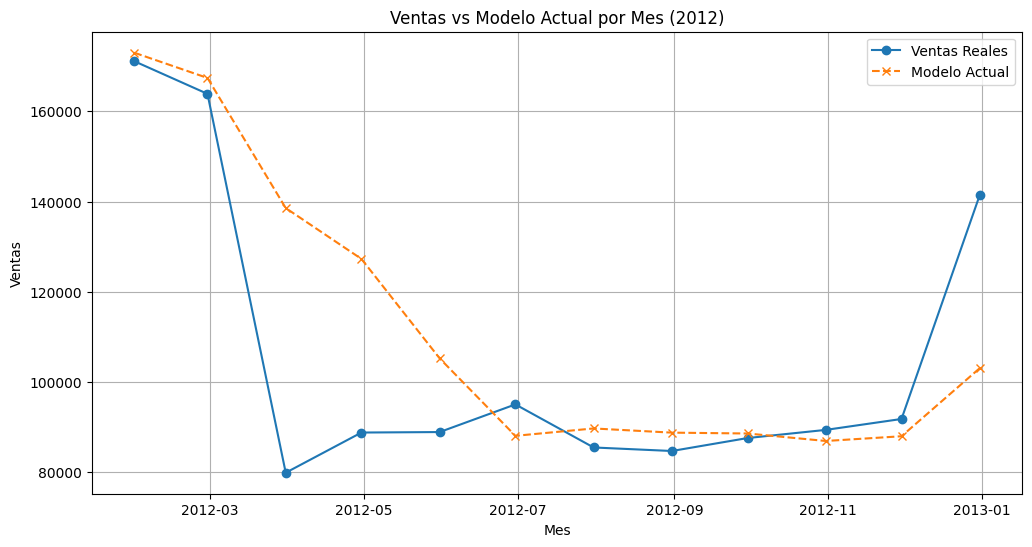

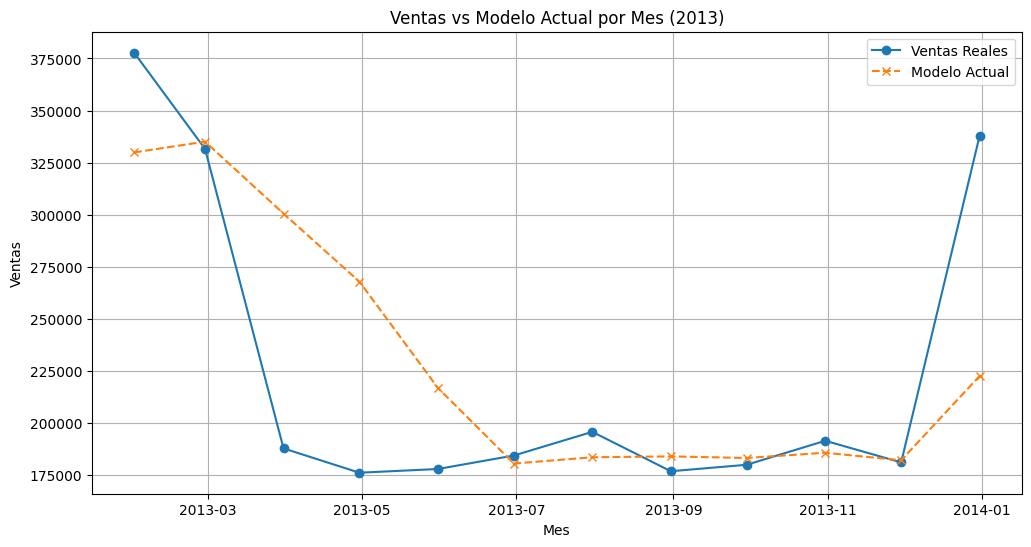

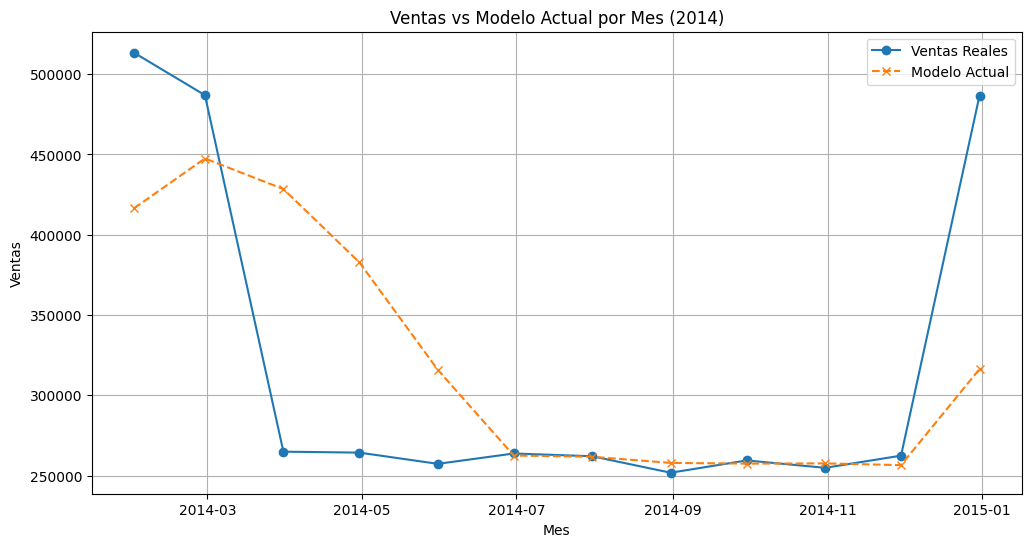

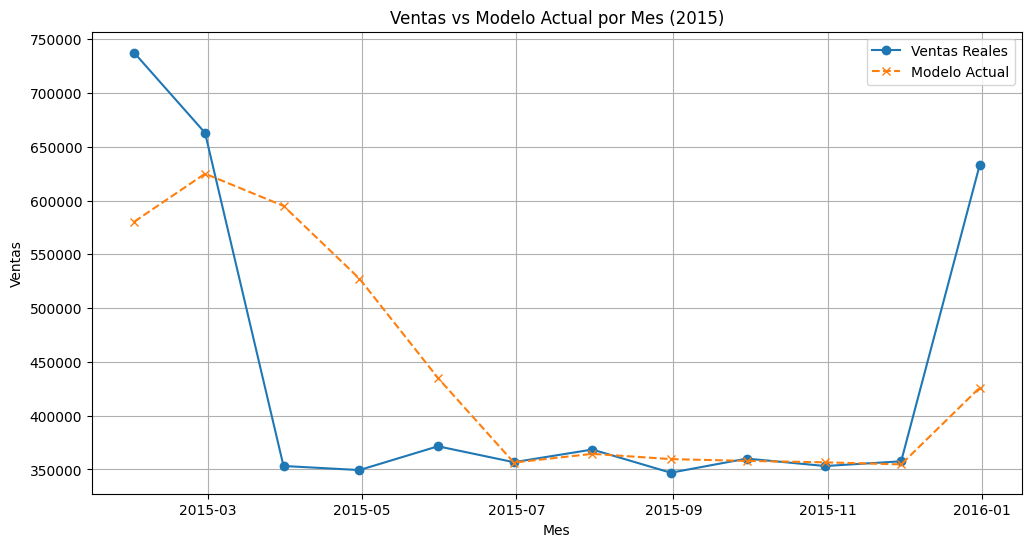

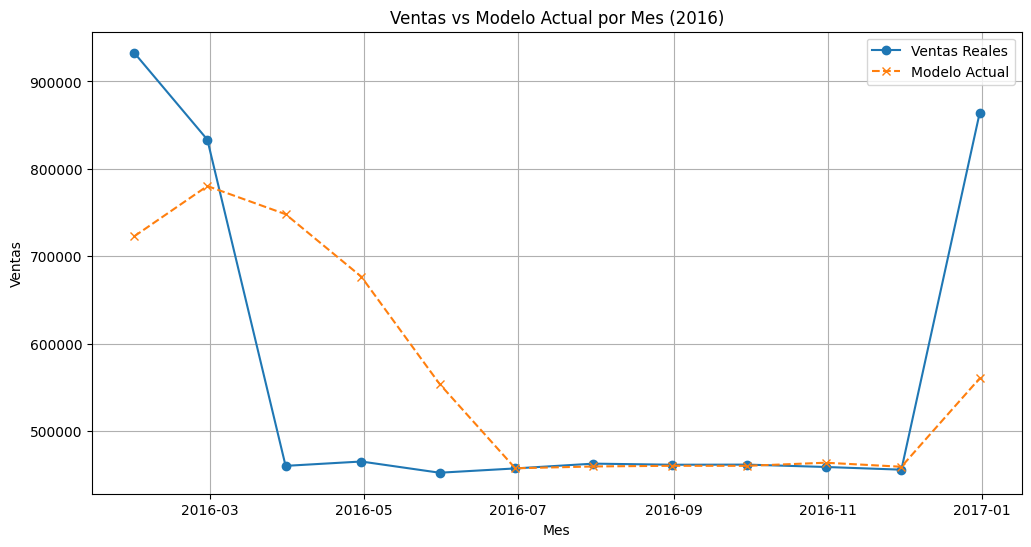

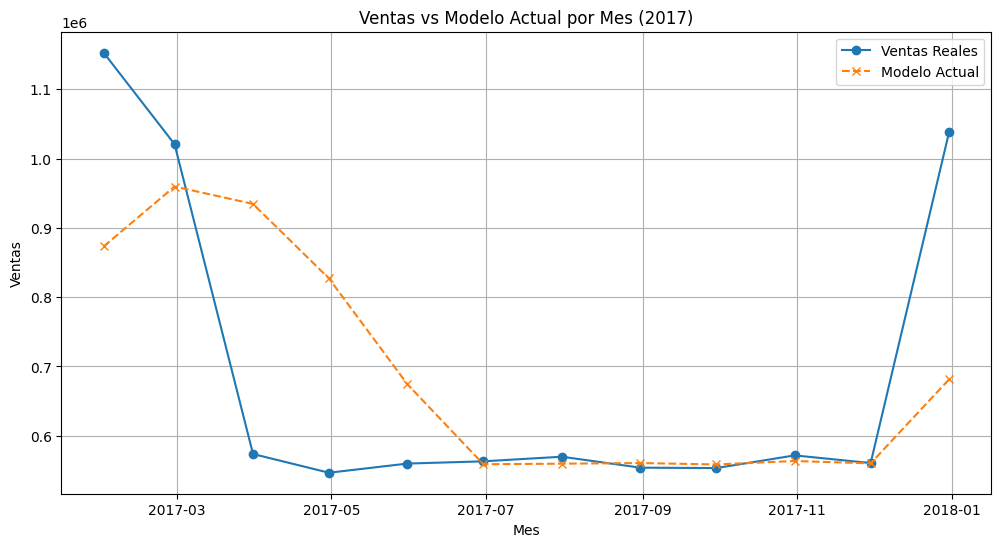

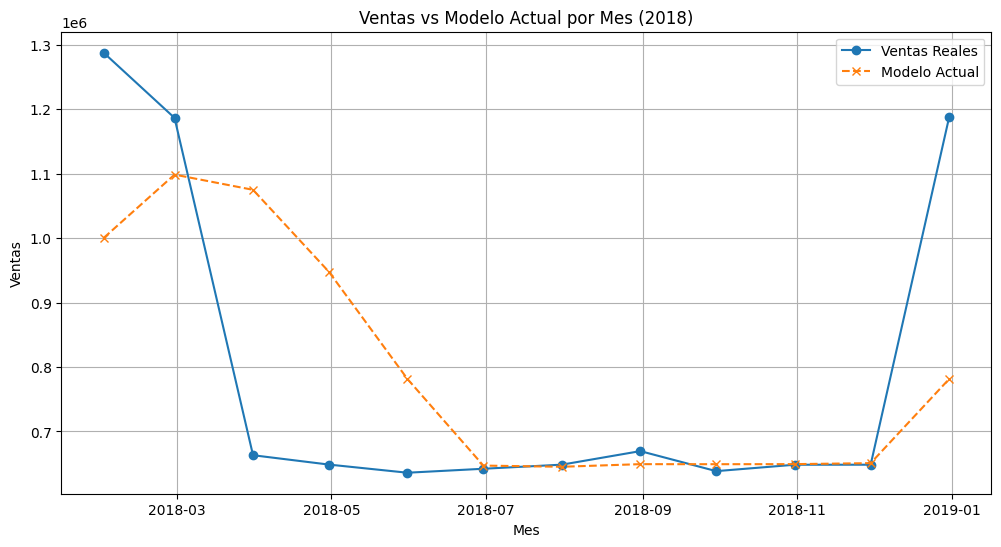

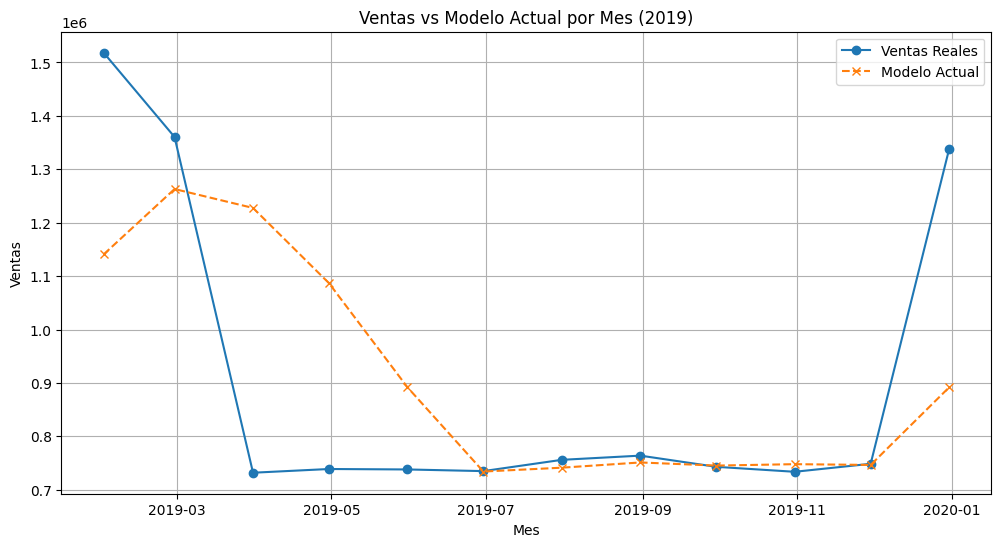

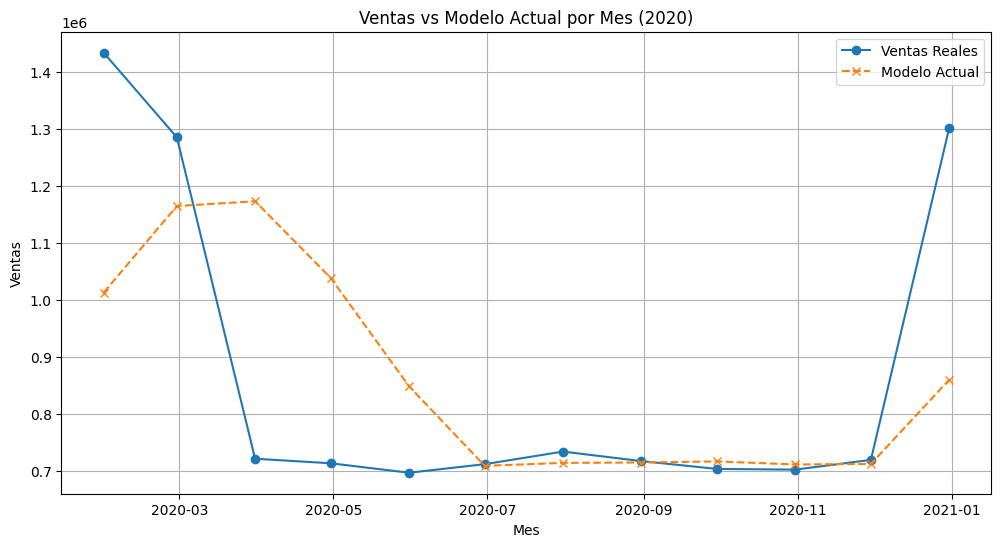

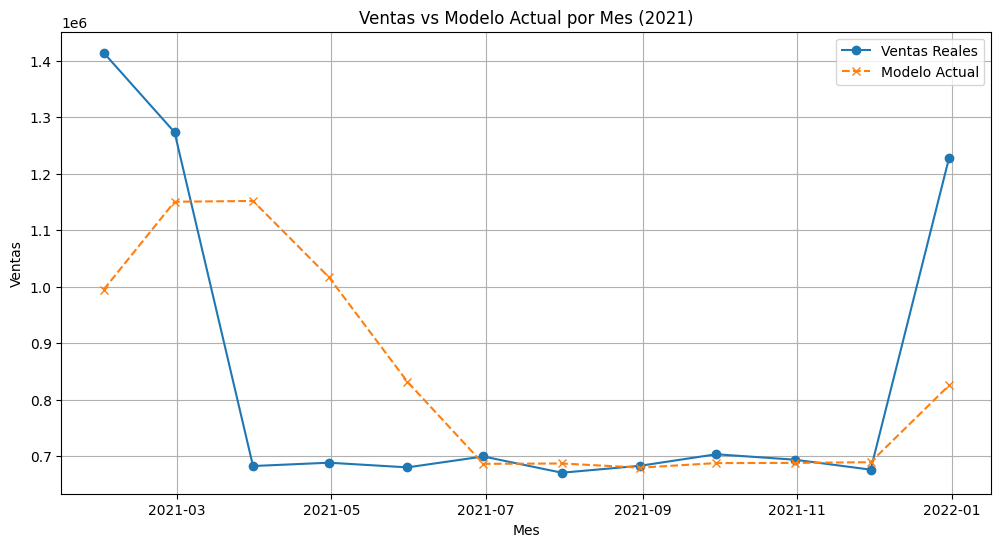

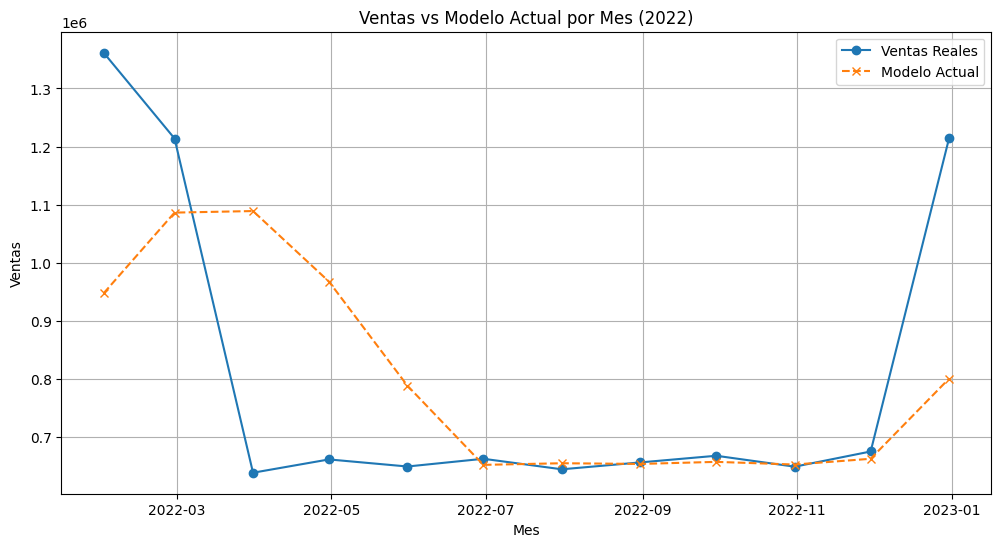

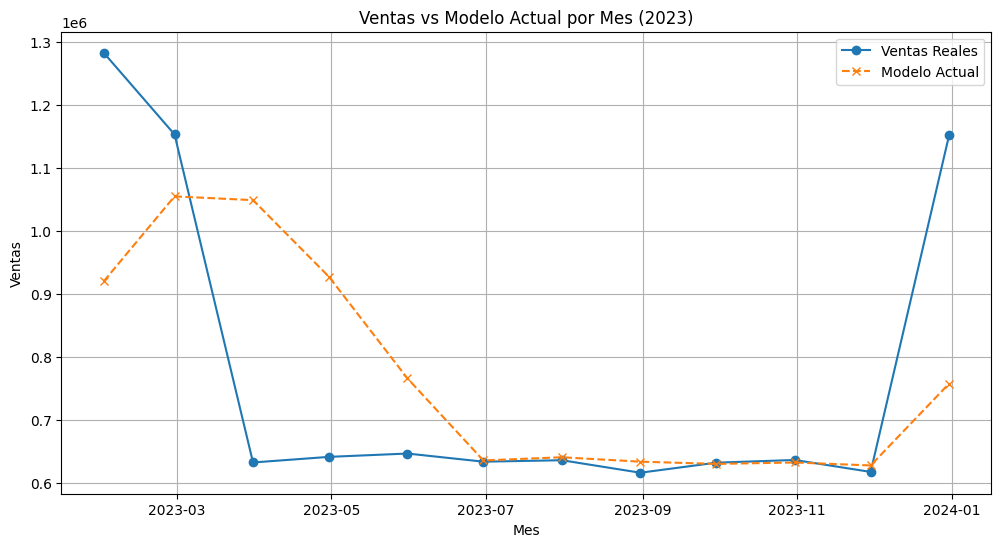

In [ ]:
# Graficar para cada año
def graficar_ventas_por_año(año):
    df_año = df[df['fecha'].dt.year == año]
    df_mes = df_año.resample('M', on='fecha').sum()[['ventas', 'modelo_actual']]

    plt.figure(figsize=(12, 6))
    plt.plot(df_mes.index, df_mes['ventas'], label='Ventas Reales', marker='o')
    plt.plot(df_mes.index, df_mes['modelo_actual'], label='Modelo Actual', linestyle='--', marker='x')
    plt.title(f'Ventas vs Modelo Actual por Mes ({año})')
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
for año in [2012,2013,2014, 2015, 2016,2017,2018,2019,2020,2021,2022,2023]:
    graficar_ventas_por_año(año)


##Análisis Estadístico del Dataset
Precio Promedio

Count: 80,748 observaciones, igual número que prod_id.
Mean: El precio promedio es de 5386.77, representando el costo medio de todos los productos.
Std: Una desviación estándar de 2893.92, indicando una significativa variabilidad en los precios entre diferentes productos.
Min-Max: Los precios varían entre 606.34 y 13,978.01, mostrando un amplio rango de precios entre los productos.

Ventas

Count: 80,748 observaciones, sugiriendo datos completos para las ventas.
Mean: La media de ventas por producto es de 1089.57.
Std: Una desviación estándar alta de 716.51, indicando gran variabilidad en las ventas de diferentes productos.
Min-Max: Las ventas varían de 0 a 6404, lo que señala que algunos productos no se vendieron, mientras que otros tuvieron altas ventas.


Modelo Actual


Count: 80,748 observaciones, permitiendo una comparación directa con las ventas reales.
Mean: Media de 1093.68, muy cercana a la media de ventas reales, sugiriendo una precisión razonable del modelo en promedio.
Std: Una desviación estándar de 507.91, menor que la de las ventas reales, lo que indica que las predicciones del modelo son menos variables.
Min-Max: El rango de predicción es de 0 a 5397.31, siendo el máximo menor que el de las ventas reales, lo que podría señalar una limitación del modelo en predecir ventas muy altas.


--Observaciones Generales--

Consistencia de Datos: El número igual de observaciones en todas las columnas sugiere consistencia y completitud en los datos.
Variabilidad en Ventas y Precios: Existe una variabilidad significativa tanto en las ventas como en los precios de los productos, lo que podría reflejar diferencias en la popularidad o demanda de distintos productos.
Comparación Modelo Actual vs Ventas Reales: La comparación entre las ventas reales y las predicciones del modelo actual indica que, aunque el modelo es preciso en promedio, podría no capturar adecuadamente la variabilidad y los extremos en las ventas de los productos.


In [ ]:
df.describe()

,precio_promedio,ventas,modelo_actual
count,80748.000000,80748.000000,80748.000000
mean,5386.770862,1089.565958,1093.682259
std,2893.919808,716.509618,507.905494
min,606.335817,0.000000,0.000000
25%,3018.438689,547.000000,713.346179
50%,5079.052675,954.000000,1064.464617
75%,7336.782635,1468.000000,1421.259490
max,13978.011657,6404.000000,5397.308408


## Análisis productos

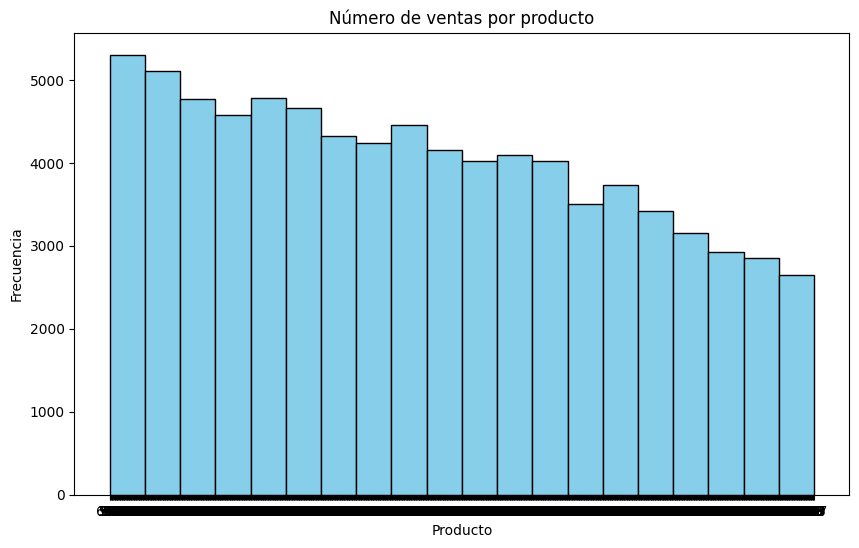

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['prod_id'], bins=20, color='skyblue', edgecolor='black')

plt.title('Número de ventas por producto')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
productos_mas_vendidos= df.groupby('prod_id')['ventas'].sum().sort_values(ascending=False)
productos_mas_vendidos= productos_mas_vendidos.reset_index()
productos_mas_vendidos

,prod_id,ventas
0,430,235439.0
1,143,230910.0
2,239,229442.0
3,376,228170.0
4,677,226779.0
...,...,...
995,446,5930.0
996,427,5919.0
997,100,5546.0
998,683,4400.0


In [ ]:
fig = px.bar(productos_mas_vendidos,
             x='prod_id',
             y='ventas',
             title='Histórico Productos Más Vendidos',
             category_orders={"prod_id": productos_mas_vendidos['prod_id'].astype(str)})

fig.show()

## Análisis ventas

Se observan ventas anuales ascendentes hasta el año 2019 de $10.9M,  luego comienzan a descender hasta el 2023 con $9.27M.

En el gráfico de los 5 productos con mayor venta por año se observa que anualmente van cambiando los productos más vemdidos hasta el punto de no figurar entre los más vendidos el siguiente año, esto quiere decir que no hay un productos estrella que se mantengan anualmente, lo que por ahora dificulta el análisis, ya que son 999 productos.

In [ ]:
ventas_por_año = df.groupby(df['fecha'].dt.year)['ventas'].sum().reset_index()
ventas_por_año.rename(columns={'fecha': 'Año'}, inplace=True)
fig = px.bar(ventas_por_año, x='Año', y='ventas', title='Ventas Totales por Año')
fig.show()

In [ ]:
ventas_anuales_por_producto = df.groupby([df['fecha'].dt.year, 'prod_id'])['ventas'].sum().reset_index()
ventas_anuales_por_producto.sort_values(by=['fecha', 'ventas'], ascending=[True, False], inplace=True)
top_100_por_año = ventas_anuales_por_producto.groupby('fecha').head(5).reset_index(drop=True)

In [ ]:
fig = px.bar(top_100_por_año,
             x='fecha',
             y='ventas',
             color='prod_id',
             title='5 Productos con mayor venta por año')
fig.show()

## Análisis de precios

In [ ]:
df.head(3)

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2012-01-01,698,8280.073778,436.0,441.953878
1,2012-01-01,167,1961.219324,1880.0,1960.518724
2,2012-01-01,331,4843.074738,819.0,860.015182


Se observa una distribución de precios cargada hacia los $6000.

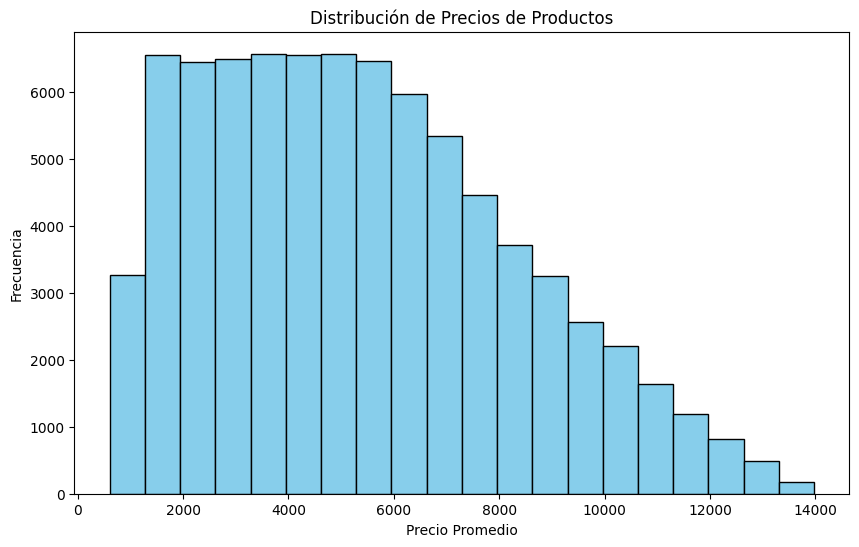

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['precio_promedio'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.show()

## Análisis de ventas

Se observa que la mayor parte de las ventas son entre $ 0-$ 1500.

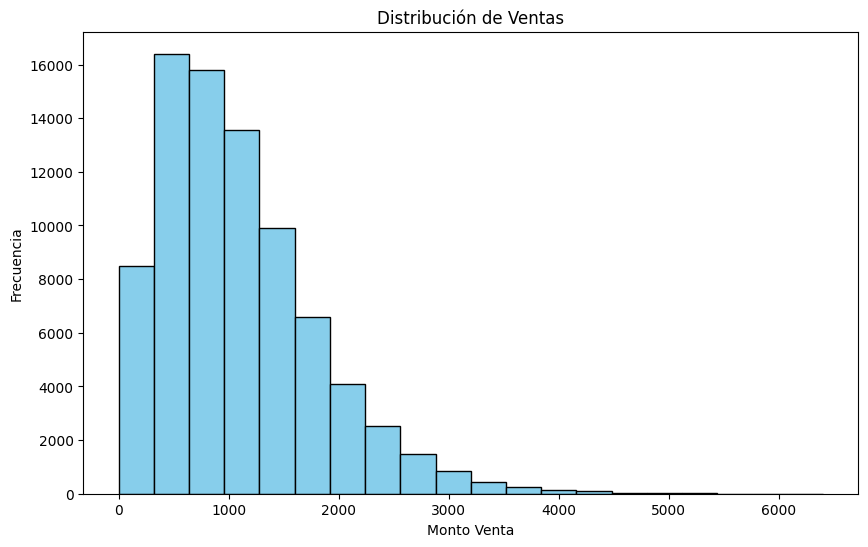

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['ventas'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribución de Ventas')
plt.xlabel('Monto Venta')
plt.ylabel('Frecuencia')
plt.show()

## 2.1 - Clustering

Se procede a realizar un análisis de clustering (agrupamiento), dado el contexto de mejorar la gestión de inventario, especialmente en este este escenario donde existe una gran cantidad de productos (999).

Un clustering podría ayudar a segmentar productos en grupos basados en patrones de venta y precios. Esto es crucial para entender qué productos tienen comportamientos de venta similares y así ayudar a la optimización del stock, que es lo que busca el problema de negocio, al identificar grupos de productos con alta demanda, se puede asegurar que estos estén más disponibles, mientras que para los de menor demanda,se puede reducir el stock para minimizar el costo de almacenamiento.

* Se hizo un clustering en 3 grupos principalmente:

Grupo 0 (Rojo): representa al grupo de productos de mayor precio promedio y de menor monto de ventas.

Grupo 1 (Verde): representa al grupo de productos de menor precio promedio y menor monto de venta.

Grupo 2 (Azul): representa al grupo de productos que abarca la mayor parte de precios, pero que tiene las mayores ventas.

Los grupos 0 y 1 presentan estacionalidad anual con leves cambios a los periodos estivales. Sin embargo el grupo 2 es el que presenta el mayor cambio, ya que en periodos de verano el aumento de sus ventas se multiplica abruptamente. Luego en periodos de invierno el grupo 1 (verde) pasa a tener las mayores ventanas, sosteniendo el negocio durante el año.

A partir del año 2019, que es donde se identifica el cambio de tendencia alcista de las ventas, grupo 0 y 1 comienzan a descender mientras grupo 2 se mantiene constante.

In [ ]:
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2012-01-01,698,8280.073778,436.0,441.953878
1,2012-01-01,167,1961.219324,1880.0,1960.518724
2,2012-01-01,331,4843.074738,819.0,860.015182
3,2012-01-01,931,12346.697520,1408.0,1351.436692
4,2012-01-01,530,6194.495105,1540.0,1522.800893


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = df[['precio_promedio', 'ventas']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=['precio_promedio', 'ventas'])
data_scaled_df.head()

,precio_promedio,ventas
0,0.999793,-0.912158
1,-1.183714,1.103180
2,-0.187876,-0.377619
3,2.405032,0.444427
4,0.279113,0.628654


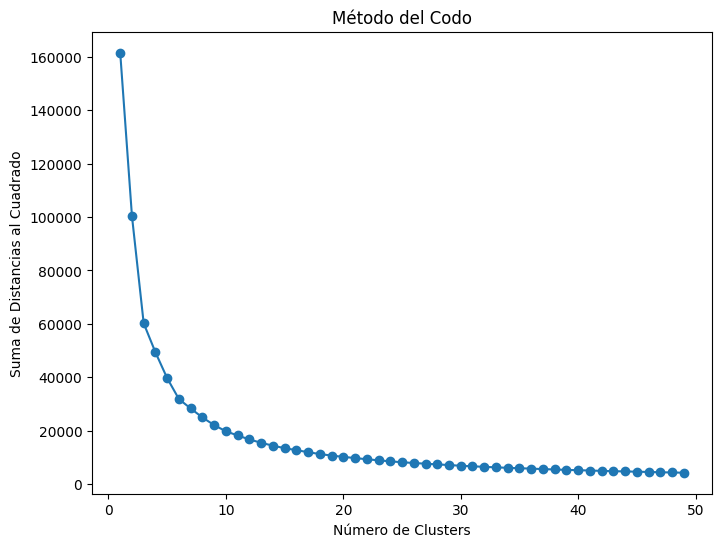

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias al Cuadrado')
plt.title('Método del Codo')
plt.show()

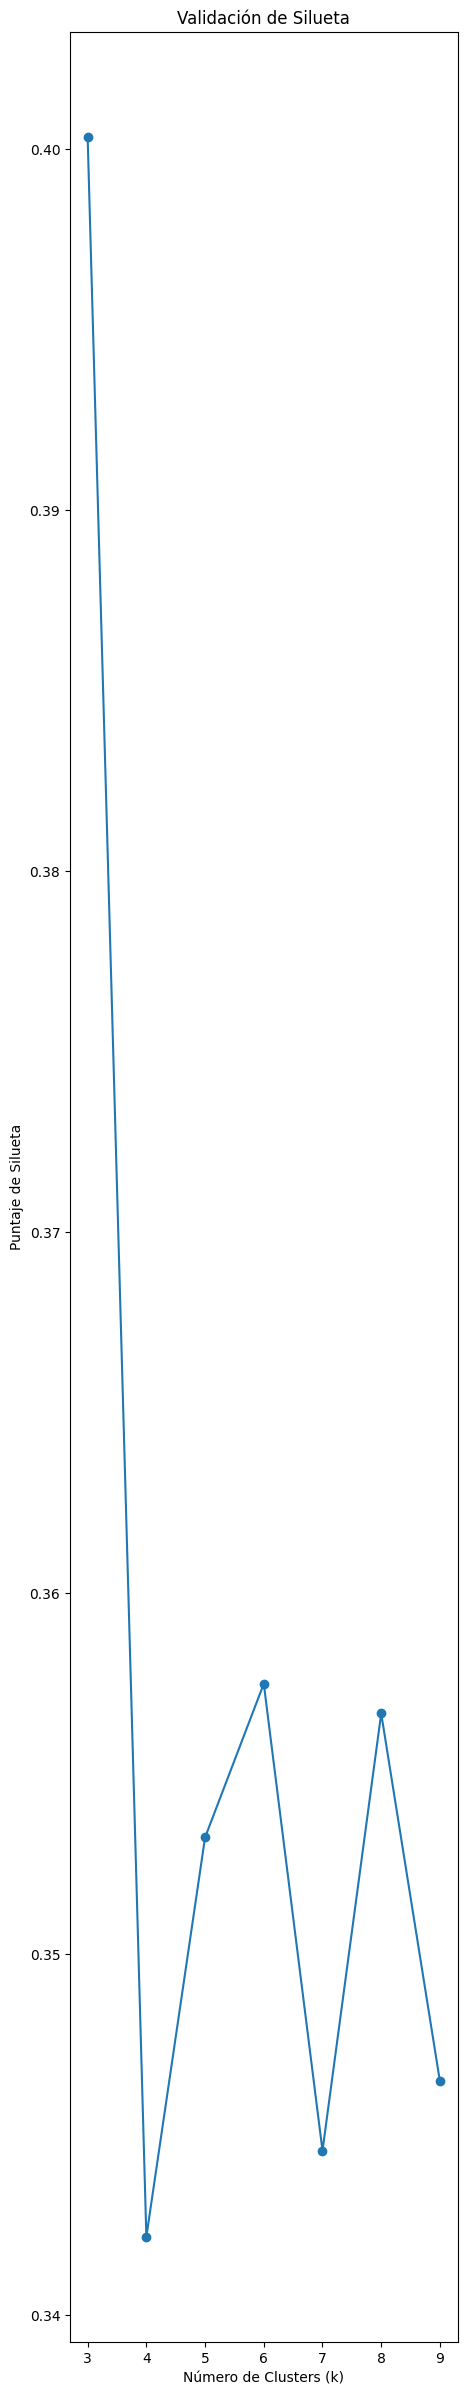

Clusters = 3, Puntaje de Silueta = 0.4003465169992578
Clusters = 4, Puntaje de Silueta = 0.3421554959474408
Clusters = 5, Puntaje de Silueta = 0.3532203733050783
Clusters = 6, Puntaje de Silueta = 0.3574786967909572
Clusters = 7, Puntaje de Silueta = 0.3445404322024388
Clusters = 8, Puntaje de Silueta = 0.3566550928057288
Clusters = 9, Puntaje de Silueta = 0.3464641050782871


In [ ]:
from sklearn.metrics import silhouette_score
k_range = range(3,10 )
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled_df)
    silhouette_avg = silhouette_score(data_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(5, 30))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntaje de Silueta')
plt.title('Validación de Silueta')
plt.show()
for k, score in zip(k_range, silhouette_scores):
    print(f'Clusters = {k}, Puntaje de Silueta = {score}')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled_df)
clusters = kmeans.labels_
data_scaled_df['cluster'] = clusters
data_scaled_df.head()

,precio_promedio,ventas,cluster
0,0.999793,-0.912158,0
1,-1.183714,1.103180,2
2,-0.187876,-0.377619,1
3,2.405032,0.444427,0
4,0.279113,0.628654,1


In [ ]:
df['cluster'] = clusters

In [ ]:
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual,cluster,año
0,2012-01-01,698,8280.073778,436.0,441.953878,0,2012
1,2012-01-01,167,1961.219324,1880.0,1960.518724,2,2012
2,2012-01-01,331,4843.074738,819.0,860.015182,1,2012
3,2012-01-01,931,12346.697520,1408.0,1351.436692,0,2012
4,2012-01-01,530,6194.495105,1540.0,1522.800893,1,2012


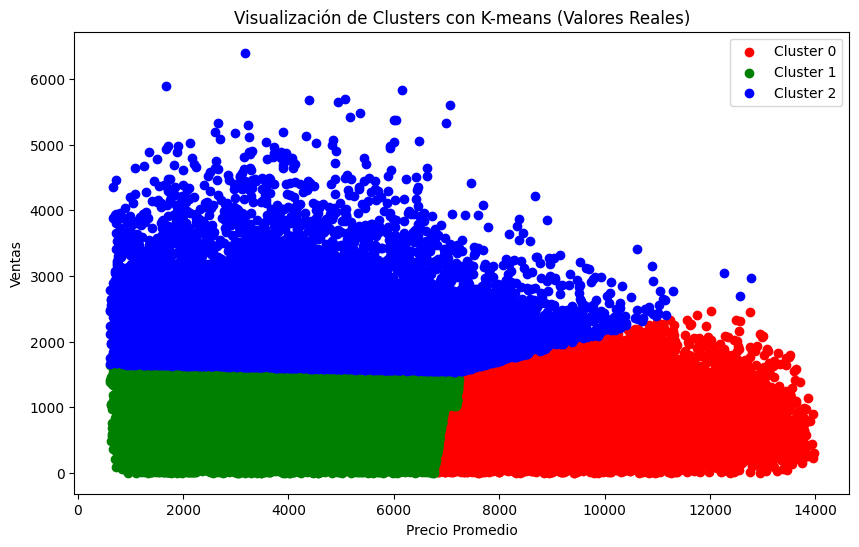

In [ ]:
colores_personalizados = ['red', 'green', 'blue']
plt.figure(figsize=(10, 6))
for i in range(len(colores_personalizados)):
    plt.scatter(df[df['cluster'] == i]['precio_promedio'],
                df[df['cluster'] == i]['ventas'],
                color=colores_personalizados[i],
                label=f'Cluster {i}')
plt.xlabel('Precio Promedio')
plt.ylabel('Ventas')
plt.title('Visualización de Clusters con K-means (Valores Reales)')
plt.legend()
plt.show()

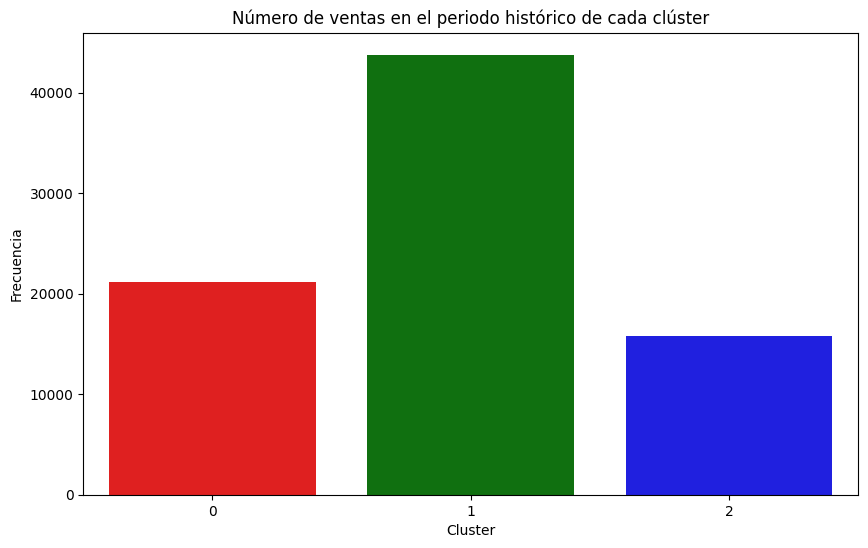

In [ ]:
import seaborn as sns
colores = ['red', 'green', 'blue']
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette=colores)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.title('Número de ventas en el periodo histórico de cada clúster')
plt.show()

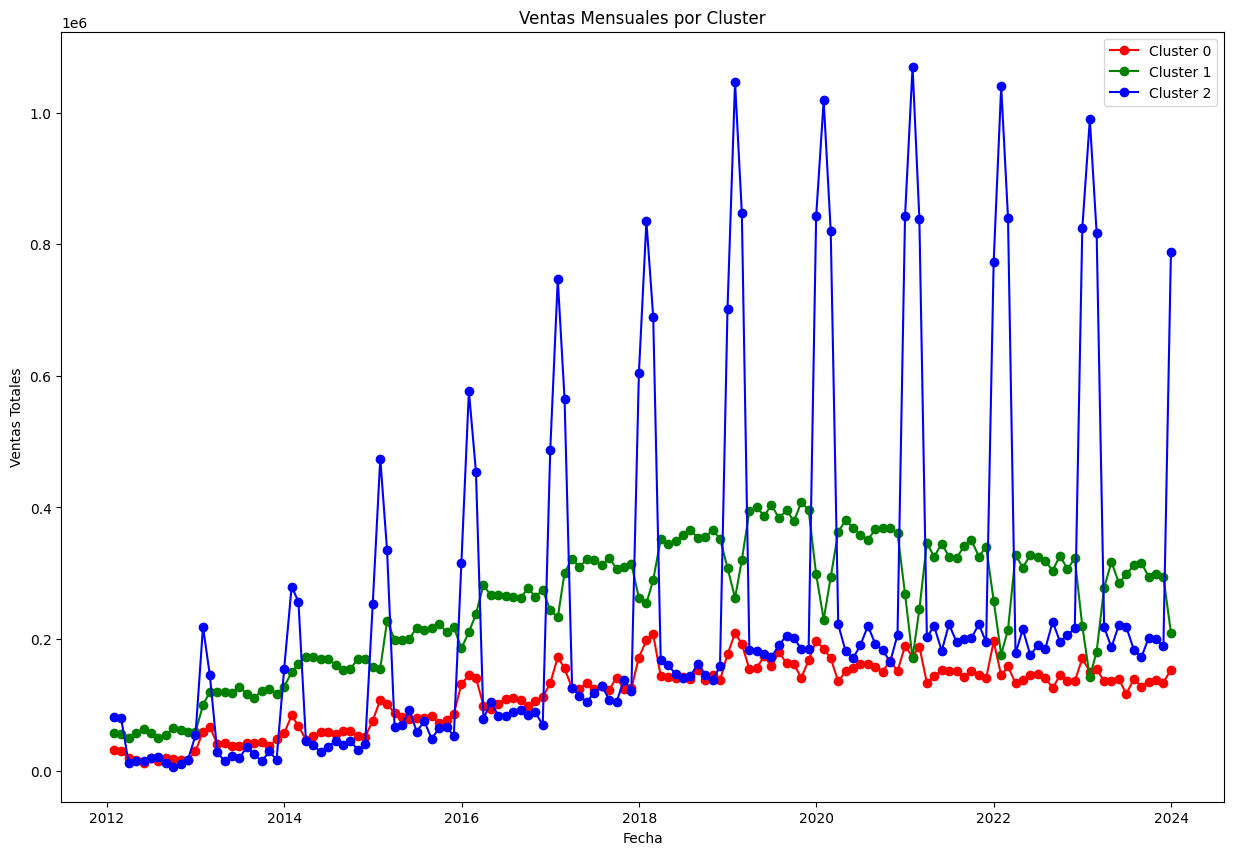

In [ ]:
ventas_mensuales = df.groupby(['cluster', pd.Grouper(key='fecha', freq='M')])['ventas'].sum().reset_index()
colores_personalizados = ['red', 'green', 'blue', 'yellow', 'purple']
plt.figure(figsize=(15, 10))
for i, cluster in enumerate(ventas_mensuales['cluster'].unique()):
    cluster_data = ventas_mensuales[ventas_mensuales['cluster'] == cluster]
    plt.plot(cluster_data['fecha'], cluster_data['ventas'], marker='o', color=colores_personalizados[i], label=f'Cluster {cluster}')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.title('Ventas Mensuales por Cluster')
plt.legend()
plt.show()

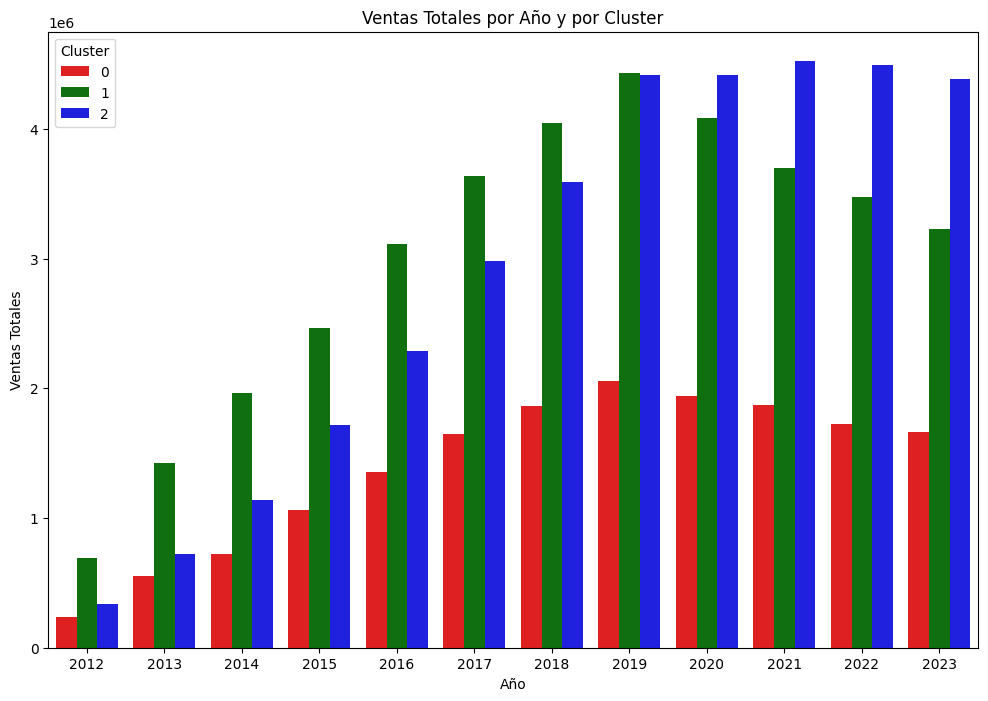

In [ ]:
df['año'] = df['fecha'].dt.year
ventas_anuales = df.groupby(['año', 'cluster'])['ventas'].sum().reset_index()
colores_personalizados = ['red', 'green', 'blue']
plt.figure(figsize=(12, 8))
sns.barplot(x='año', y='ventas', hue='cluster', data=ventas_anuales, palette=colores_personalizados)
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Año y por Cluster')
plt.legend(title='Cluster')
plt.show()

# 3- Desarrollo de modelos


Se trabajará con dos enfoques principalmente para predecir las ventas, uno es de machine learning con XGBRegressor y el otro desde métodos estadísticos con Prophet.


**XGBR** es especialmente eficaz en problemas de regresión, esto lo hace ideal para pronosticar las ventas con comportamientos no linealos como es nuestro caso y veremos si puede predecir las ventas en los picos de venta.

**Prophet** es particularmente fuerte en la modelación de tendencias y patrones estacionales, lo cuál es crucial en el problema planteado de predicción de las ventas con tendencia estacional.

##Validaciones Aplicadas

Las validaciones a aplicar para medir la eficacia del modelo son:

 **MSE** (Mean Squared Error) porque penaliza los errores grandes, lo que es crucial cuando estos errores son especialmente indeseables, dando una idea de cuán bien el modelo se ajusta a los datos en términos de error cuadrático.

 El **RMSE**, siendo la raíz cuadrada del MSE, ofrece una perspectiva similar pero en las mismas unidades que la variable objetivo, facilitando la interpretación.

El **MAE** (Mean Absolute Error) proporciona una visión del error medio sin dar tanto peso a los valores atípicos, siendo una medida más directa y robusta en presencia de estos.

Finalmente, **R-squared** resalta la capacidad del modelo para explicar la variabilidad de los datos, con valores más altos indicando un mejor ajuste.

In [ ]:
df = df[['fecha','ventas']]
df= df.resample('M', on='fecha').sum()[['ventas']]
df.head()

,ventas
fecha,
2012-01-31,171115.0
2012-02-29,163879.0
2012-03-31,79903.0
2012-04-30,88810.0
2012-05-31,88917.0


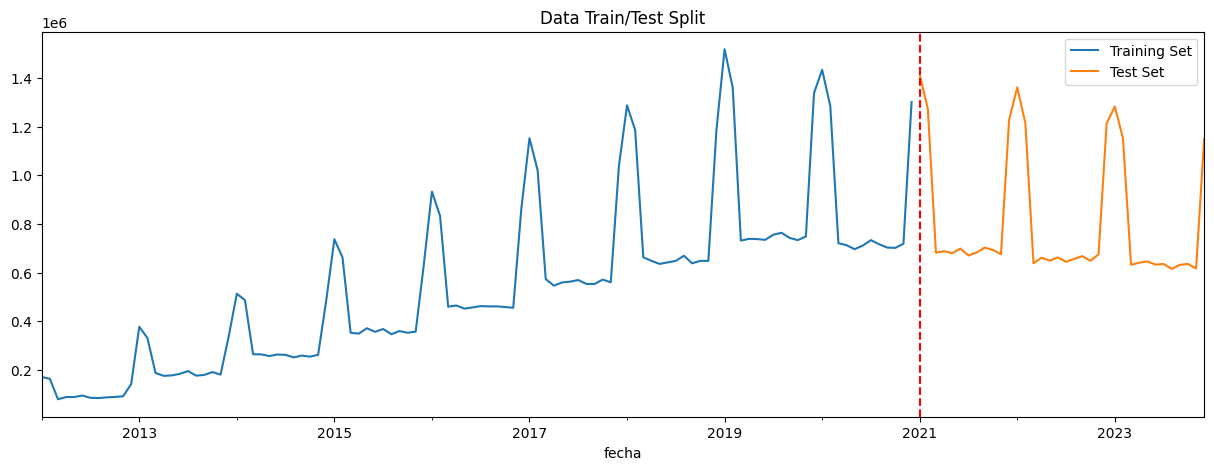

In [ ]:
train = df.loc[df.index < '2021-01-01']
test = df.loc[df.index >= '2021-01-01']
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline(pd.to_datetime('2021-01-01'), color='red', ls='--')
ax.legend(['Training Set', 'Test Set'])
ax.set_title('Data Train/Test Split')
plt.show()


## 3.1 - Desarrollo de Modelo XGBoost Regressor

In [ ]:
def create_features(df):
    df = df.copy()
    df['mes'] = df.index.month
    df['año'] = df.index.year
    return df

df = create_features(df)

In [ ]:
df.head()

,ventas,mes,año
fecha,,,
2012-01-31,171115.0,1,2012
2012-02-29,163879.0,2,2012
2012-03-31,79903.0,3,2012
2012-04-30,88810.0,4,2012
2012-05-31,88917.0,5,2012


In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = [ 'mes', 'año']
TARGET = 'ventas'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.01,
    min_child_weight=5,
    gamma=2,
    objective='reg:squarederror'
)

reg.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          early_stopping_rounds=50,
          verbose=100)


[0]	validation_0-rmse:367863.16641
[100]	validation_0-rmse:170365.13370
[200]	validation_0-rmse:95670.54904
[300]	validation_0-rmse:82218.93395
[400]	validation_0-rmse:78782.02249
[500]	validation_0-rmse:77925.61797
[526]	validation_0-rmse:78182.57911


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

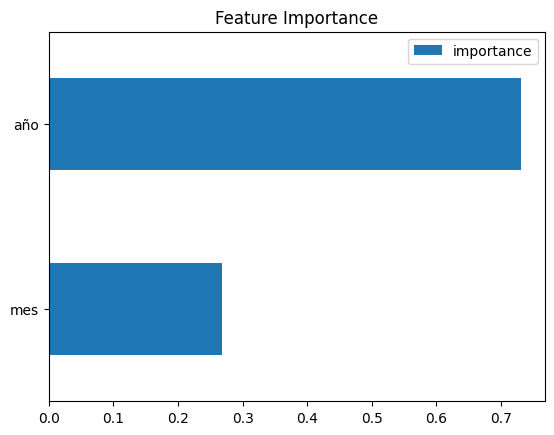

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

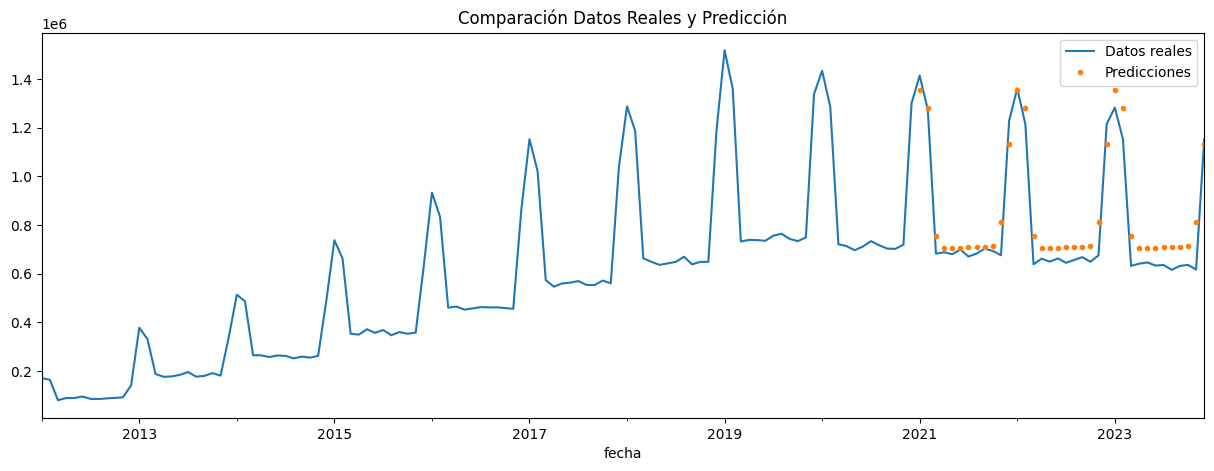

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['ventas']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Datos reales', 'Predicciones'])
ax.set_title('Comparación Datos Reales y Predicción')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error

mse_xgbr = mean_squared_error(test['ventas'], test['prediction'])
rmse_xgbr = np.sqrt(mse_xgbr)
mae_xgbr = mean_absolute_error(test['ventas'], test['prediction'])
r2_xgbr = r2_score(test['ventas'], test['prediction'])

print("MSE Error xgbr: ", mse_xgbr)
print("RMSE Error xgbr: ", rmse_xgbr)
print("MAE Error xgbr: ", mae_xgbr)
print("R-squared xgbr: ", r2_xgbr)

MSE Error xgbr:  6055669955.447374
RMSE Error xgbr:  77818.18524899802
MAE Error xgbr:  65267.526041666664
R-squared xgbr:  0.9121705559805097


In [ ]:
forecast_xgbr = pd.DataFrame(test['prediction'] )
forecast_xgbr = forecast_xgbr.reset_index()
forecast_xgbr

,fecha,prediction
0,2021-01-31,1.353075e+06
1,2021-02-28,1.282228e+06
2,2021-03-31,7.561299e+05
3,2021-04-30,7.065728e+05
4,2021-05-31,7.065728e+05
5,2021-06-30,7.065728e+05
6,2021-07-31,7.085636e+05
7,2021-08-31,7.085636e+05
8,2021-09-30,7.085636e+05
9,2021-10-31,7.141374e+05


## 3.2- Desarrollo de Modelo con **Prophet**

Para el modelo prophet se aplican los siguientes hiperparámetros:

Estacionalidad Anual: Ya que los datos muestran una fuerte estacionalidad anual (debido a que todos los años las ventas presentan el mismo patróm), entonces un seasonality_prior_scale más bajo es apropiado para capturar estas variaciones.Dado un rango normal entre 0.1 y 10, se elije 0.5.

Cambios en la Tendencia: Debido a que la serie de tiempo muestra cambios significativos en la tendencia a lo largo del año, dado cambios abruptos en el comporamiento de las ventas en meses de verano, entonces un changepoint_prior_scale más alto ayudaría a detectar y adaptarse a estos cambios.Los valores comunes oscilan entre 0.001 (muy insensible) y 0.5 (muy sensible) por lo se usará un valor de 6.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data science/Desafío BrainFood/desafio_modelo_de_demanda.csv')
df.fecha = pd.to_datetime(df.fecha)
df = df.sort_values(by='fecha')
df = df.reset_index(drop=True)
df.head(3)

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2012-01-01,698,8280.073778,436.0,441.953878
1,2012-01-01,167,1961.219324,1880.0,1960.518724
2,2012-01-01,331,4843.074738,819.0,860.015182


In [ ]:
from prophet import Prophet

In [ ]:
df = df.reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            80748 non-null  int64         
 1   fecha            80748 non-null  datetime64[ns]
 2   prod_id          80748 non-null  int64         
 3   precio_promedio  80748 non-null  float64       
 4   ventas           80748 non-null  float64       
 5   modelo_actual    80748 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.7 MB


In [ ]:
df_prophet = df[['fecha','ventas']]
df_prophet = df_prophet.resample('M', on='fecha').sum().reset_index()
df_prophet.head()

,fecha,ventas
0,2012-01-31,171115.0
1,2012-02-29,163879.0
2,2012-03-31,79903.0
3,2012-04-30,88810.0
4,2012-05-31,88917.0


In [ ]:
df_prophet = df_prophet.rename(columns={'fecha': 'ds', 'ventas': 'y'})
df_prophet.head()

,ds,y
0,2012-01-31,171115.0
1,2012-02-29,163879.0
2,2012-03-31,79903.0
3,2012-04-30,88810.0
4,2012-05-31,88917.0


In [ ]:
train = df_prophet.loc[df_prophet["ds"] < '2021-01-01']
testp = df_prophet.loc[df_prophet["ds"] >= '2021-01-01']

In [ ]:
train.head()

,ds,y
0,2012-01-31,171115.0
1,2012-02-29,163879.0
2,2012-03-31,79903.0
3,2012-04-30,88810.0
4,2012-05-31,88917.0


In [ ]:
testp.tail()

,ds,y
139,2023-08-31,615778.0
140,2023-09-30,631728.0
141,2023-10-31,636012.0
142,2023-11-30,617060.0
143,2023-12-31,1151939.0


In [ ]:
model_prophet = Prophet(
    seasonality_prior_scale=0.5,
    changepoint_prior_scale=6
)

model_prophet.fit(train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o_o2mae/t54odwkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o_o2mae/987cv3pz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47562', 'data', 'file=/tmp/tmp6o_o2mae/t54odwkf.json', 'init=/tmp/tmp6o_o2mae/987cv3pz.json', 'output', 'file=/tmp/tmp6o_o2mae/prophet_modelinf_bkgr/prophet_model-20240127184309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_prophet.make_future_dataframe(periods=len(testp), freq='M')
forecast = model_prophet.predict(future)

In [ ]:
forecast = forecast[forecast['ds'].isin(testp['ds'])]
forecast = forecast[['ds', 'yhat']]
forecast

,ds,yhat
108,2021-01-31,1.317768e+06
109,2021-02-28,1.216842e+06
110,2021-03-31,8.134766e+05
111,2021-04-30,7.529102e+05
112,2021-05-31,7.245099e+05
113,2021-06-30,7.050632e+05
114,2021-07-31,7.029045e+05
115,2021-08-31,6.911606e+05
116,2021-09-30,7.007454e+05
117,2021-10-31,7.244722e+05


In [ ]:
testp = testp.reset_index().merge(forecast[['ds', 'yhat']], how='left', on='ds')
testp

,index,ds,y,yhat
0,108,2021-01-31,1414162.0,1.317768e+06
1,109,2021-02-28,1273364.0,1.216842e+06
2,110,2021-03-31,682201.0,8.134766e+05
3,111,2021-04-30,688081.0,7.529102e+05
4,112,2021-05-31,679819.0,7.245099e+05
5,113,2021-06-30,699127.0,7.050632e+05
6,114,2021-07-31,670347.0,7.029045e+05
7,115,2021-08-31,682703.0,6.911606e+05
8,116,2021-09-30,703035.0,7.007454e+05
9,117,2021-10-31,693401.0,7.244722e+05


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_prophet = mean_squared_error(testp['y'], testp['yhat'])
rmse_prophet = np.sqrt(mse_prophet)
mae_prophet = mean_absolute_error(testp['y'], testp['yhat'])
r2_prophet = r2_score(testp['y'], testp['yhat'])
print("Modelo Prophet:")
print("MSE Error: ", mse_prophet)
print("RMSE Error: ", rmse_prophet)
print("MAE Error: ", mae_prophet)
print("R-squared: ", r2_prophet)

Modelo Prophet:
MSE Error:  3776606081.534666
RMSE Error:  61454.097353509846
MAE Error:  49526.354007507995
R-squared:  0.9452253483326915


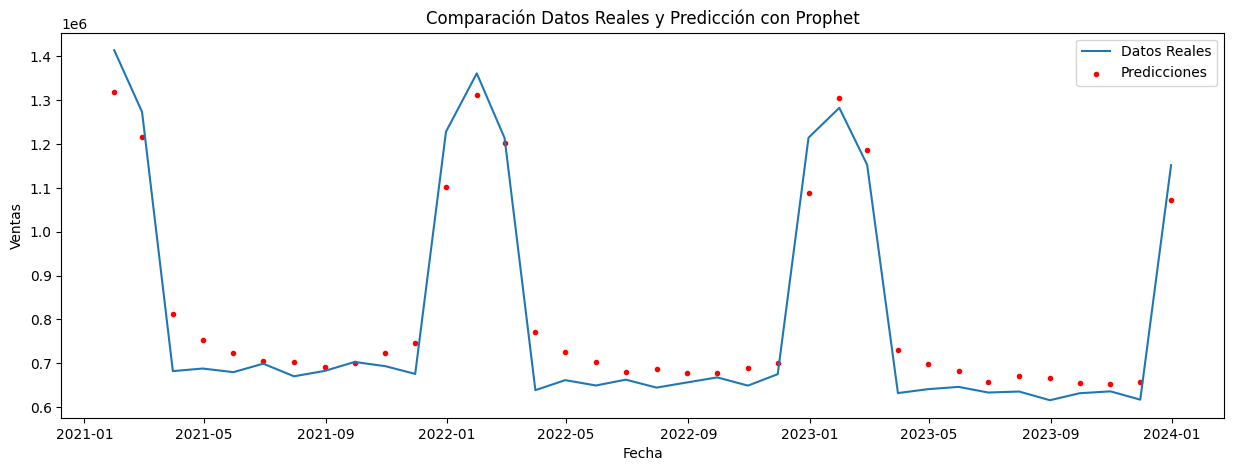

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(testp['ds'], testp['y'], label='Datos Reales')
plt.scatter(testp['ds'], testp['yhat'], label='Predicciones', color='red', marker='.')
plt.legend()
plt.title('Comparación Datos Reales y Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

# 4- Comparación de Modelos y Selección

**Selección del Modelo: Prophet**


Basado en las métricas, Prophet es el modelo más efectivo. Ofrece el menor error (tanto en MSE como en MAE) y el mayor valor de R-squared. Esto indica que no solo es más preciso en promedio, sino que también es más consistente en sus predicciones en comparación con los otros modelos.

El modelo con Prophet, además capta mejor las predicciones de ventas máximas y mínimas, así como la leve tendencia descendente de los máximos y mínimos a lo largo del tiempo.


In [ ]:
# Métricas del modelo actual
mse_actual = 34358695653.62017
rmse_actual = 185360.98741002695
mae_actual = 111550.60005993495
r2_actual = 0.7009476358342744

# Métricas actualizadas del modelo XGBoost Regressor
mse_xgb = 6055669955.447374
rmse_xgb = 77818.18524899802
mae_xgb = 65267.526041666664
r2_xgb = 0.9121705559805097

# Métricas actualizadas del modelo Prophet
mse_prophet = 3776606081.534666
rmse_prophet =  61454.097353509846
mae_prophet = 49526.354007507995
r2_prophet = 0.9452253483326915

# Etiquetas y valores para cada modelo
modelos = ['Modelo Actual', 'XGBoost Regressor', 'Prophet']
metricas = ['MSE', 'RMSE', 'MAE', 'R-squared']
valores = [
    [mse_actual, mse_xgb, mse_prophet],
    [rmse_actual, rmse_xgb, rmse_prophet],
    [mae_actual, mae_xgb, mae_prophet],
    [r2_actual, r2_xgb, r2_prophet]
]


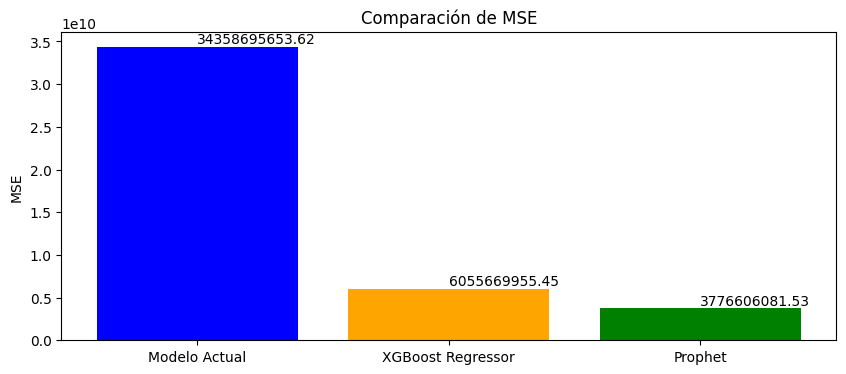

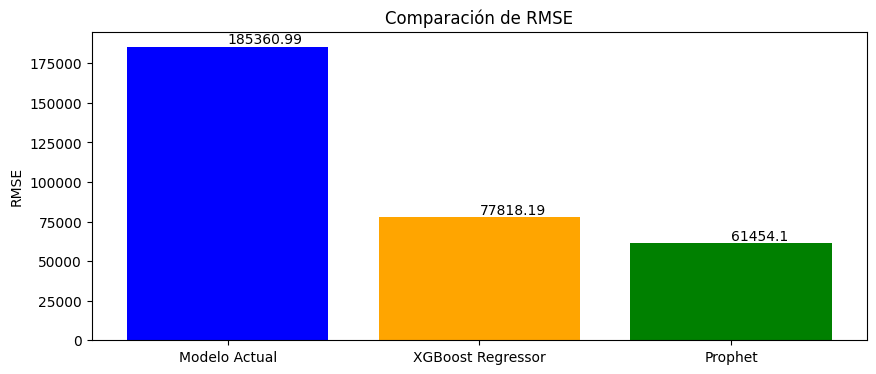

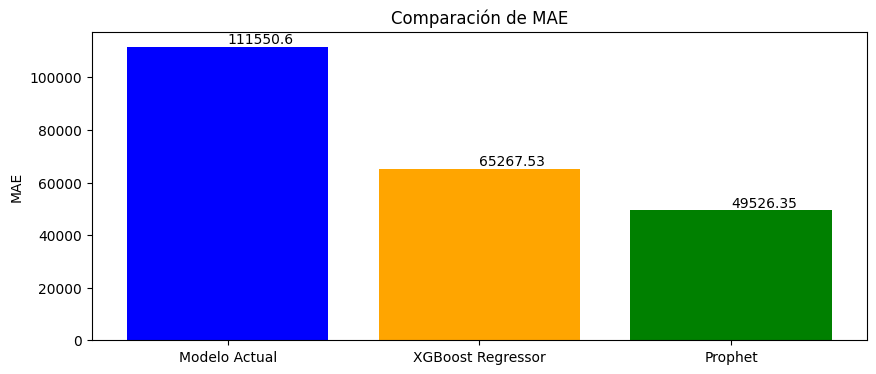

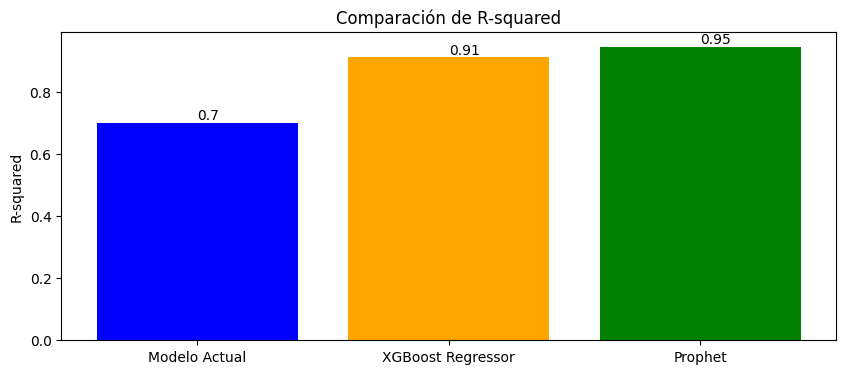

In [ ]:
import matplotlib.pyplot as plt


for i, metrica in enumerate(metricas):
    plt.figure(figsize=(10, 4))
    barras = plt.bar(modelos, valores[i], color=['blue', 'orange', 'green'])

    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2.0, yval, round(yval, 2), va='bottom')

    plt.title(f'Comparación de {metrica}')
    plt.ylabel(metrica)
    plt.show()


In [ ]:
grafico['fecha'] = pd.to_datetime(grafico['fecha'])
forecast_xgbr['fecha'] = pd.to_datetime(forecast_xgbr['fecha'])
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast.rename(columns={'ds': 'fecha'}, inplace=True)
combined_df = grafico.merge(forecast_xgbr[['fecha', 'prediction']], on='fecha', how='left')
combined_df = combined_df.merge(forecast[['fecha', 'yhat']], on='fecha', how='left')
combined_df.rename(columns={'prediction': 'pred_xgboost', 'yhat': 'pred_prophet'}, inplace=True)


In [ ]:
combined_df

,fecha,ventas,modelo_actual,pred_xgboost,pred_prophet
0,2021-01-31,1414162.0,9.945777e+05,1.353075e+06,1.317768e+06
1,2021-02-28,1273364.0,1.150227e+06,1.282228e+06,1.216842e+06
2,2021-03-31,682201.0,1.151661e+06,7.561299e+05,8.134766e+05
3,2021-04-30,688081.0,1.016492e+06,7.065728e+05,7.529102e+05
4,2021-05-31,679819.0,8.314231e+05,7.065728e+05,7.245099e+05
5,2021-06-30,699127.0,6.860671e+05,7.065728e+05,7.050632e+05
6,2021-07-31,670347.0,6.867010e+05,7.085636e+05,7.029045e+05
7,2021-08-31,682703.0,6.793484e+05,7.085636e+05,6.911606e+05
8,2021-09-30,703035.0,6.874027e+05,7.085636e+05,7.007454e+05
9,2021-10-31,693401.0,6.877328e+05,7.141374e+05,7.244722e+05


In [ ]:
combined_df.to_csv('combined_df.csv', index=False)

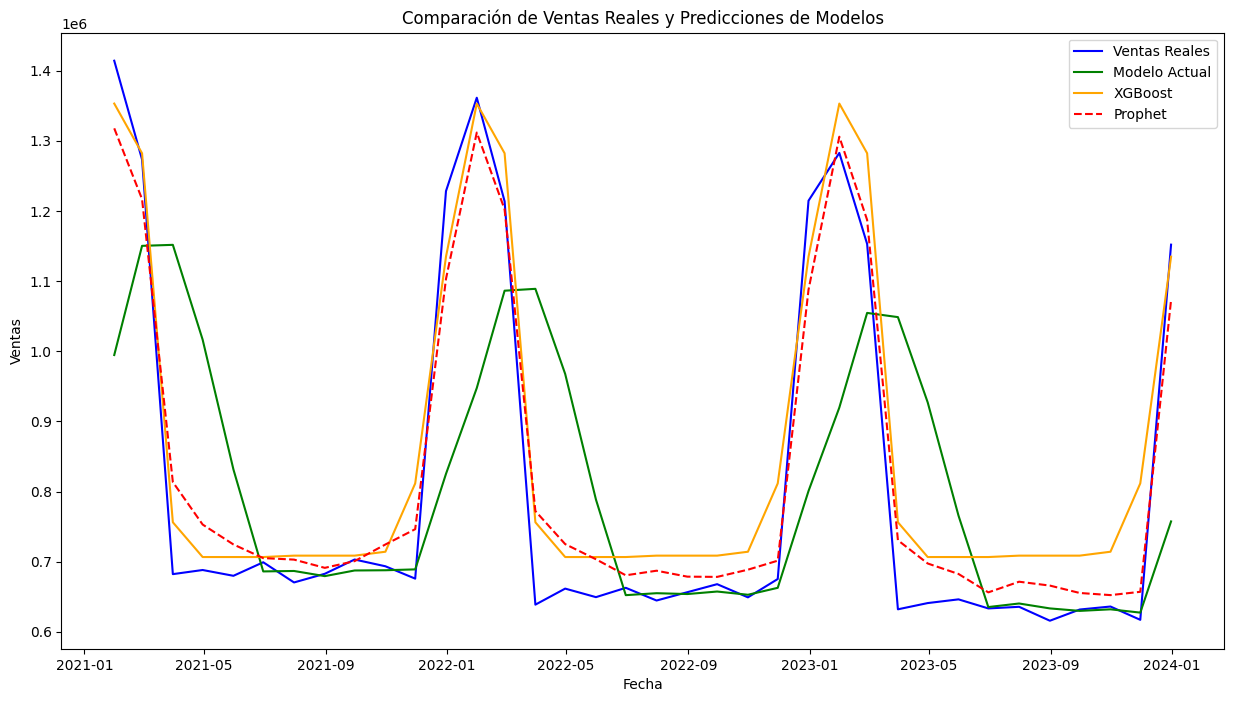

In [ ]:
combined_df['fecha'] = pd.to_datetime(combined_df['fecha'])
plt.figure(figsize=(15, 8))

# Graficar cada serie
plt.plot(combined_df['fecha'], combined_df['ventas'], label='Ventas Reales', color='blue')
plt.plot(combined_df['fecha'], combined_df['modelo_actual'], label='Modelo Actual', color='green')
plt.plot(combined_df['fecha'], combined_df['pred_xgboost'], label='XGBoost', color='orange')
plt.plot(combined_df['fecha'], combined_df['pred_prophet'], label='Prophet', color='red', linestyle='--')

plt.title('Comparación de Ventas Reales y Predicciones de Modelos')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# 5- Predicciones 2024

Debido a que en año 2019 existe un punto de quiebre en cuanto a tendencia, se procederá a re-entrenar un modelo con Prophet tomando todo el conjunto de datos, para que así en esta oportunidad el modelo nuevo se alimente de la tendecia descendente mostrada en los años 2021,2022 y 2023.

In [ ]:
from prophet import Prophet
df = df.reset_index()
df_prophet = df[['fecha','ventas']]
df_prophet = df_prophet.resample('M', on='fecha').sum().reset_index()
df_prophet = df_prophet.rename(columns={'fecha': 'ds', 'ventas': 'y'})

In [ ]:
df_prophet.head()

,ds,y
0,2012-01-31,171115.0
1,2012-02-29,163879.0
2,2012-03-31,79903.0
3,2012-04-30,88810.0
4,2012-05-31,88917.0


In [ ]:
train = df_prophet.copy()

In [ ]:
train

,ds,y
0,2012-01-31,171115.0
1,2012-02-29,163879.0
2,2012-03-31,79903.0
3,2012-04-30,88810.0
4,2012-05-31,88917.0
...,...,...
139,2023-08-31,615778.0
140,2023-09-30,631728.0
141,2023-10-31,636012.0
142,2023-11-30,617060.0


In [ ]:
model_prophet = Prophet(
    seasonality_prior_scale=0.5,
    changepoint_prior_scale=6
)

model_prophet.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o_o2mae/os2v_o_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o_o2mae/slm1j7ez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67364', 'data', 'file=/tmp/tmp6o_o2mae/os2v_o_e.json', 'init=/tmp/tmp6o_o2mae/slm1j7ez.json', 'output', 'file=/tmp/tmp6o_o2mae/prophet_modely0h1d1xy/prophet_model-20240127184732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:47:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_prophet.make_future_dataframe(periods=12, freq='M')

In [ ]:
print(future.tail(12))

            ds
144 2024-01-31
145 2024-02-29
146 2024-03-31
147 2024-04-30
148 2024-05-31
149 2024-06-30
150 2024-07-31
151 2024-08-31
152 2024-09-30
153 2024-10-31
154 2024-11-30
155 2024-12-31


In [ ]:
forecast = model_prophet.predict(future)

In [ ]:
print(forecast[['ds', 'yhat']].tail(12))

            ds          yhat
144 2024-01-31  1.231319e+06
145 2024-02-29  1.085453e+06
146 2024-03-31  7.115596e+05
147 2024-04-30  6.734290e+05
148 2024-05-31  6.319069e+05
149 2024-06-30  6.076926e+05
150 2024-07-31  6.023552e+05
151 2024-08-31  6.081382e+05
152 2024-09-30  6.219471e+05
153 2024-10-31  6.400170e+05
154 2024-11-30  6.449210e+05
155 2024-12-31  1.004116e+06


In [ ]:
df1 = forecast[["ds", "yhat"]].tail(12)
df1

,ds,yhat
144,2024-01-31,1.231319e+06
145,2024-02-29,1.085453e+06
146,2024-03-31,7.115596e+05
147,2024-04-30,6.734290e+05
148,2024-05-31,6.319069e+05
149,2024-06-30,6.076926e+05
150,2024-07-31,6.023552e+05
151,2024-08-31,6.081382e+05
152,2024-09-30,6.219471e+05
153,2024-10-31,6.400170e+05


In [ ]:
#Exportar CSV
df1 = df1.rename(columns={'ds': 'fecha', 'yhat': 'predicciones'})
df1.to_csv('predicciones_2024.csv', index=False)

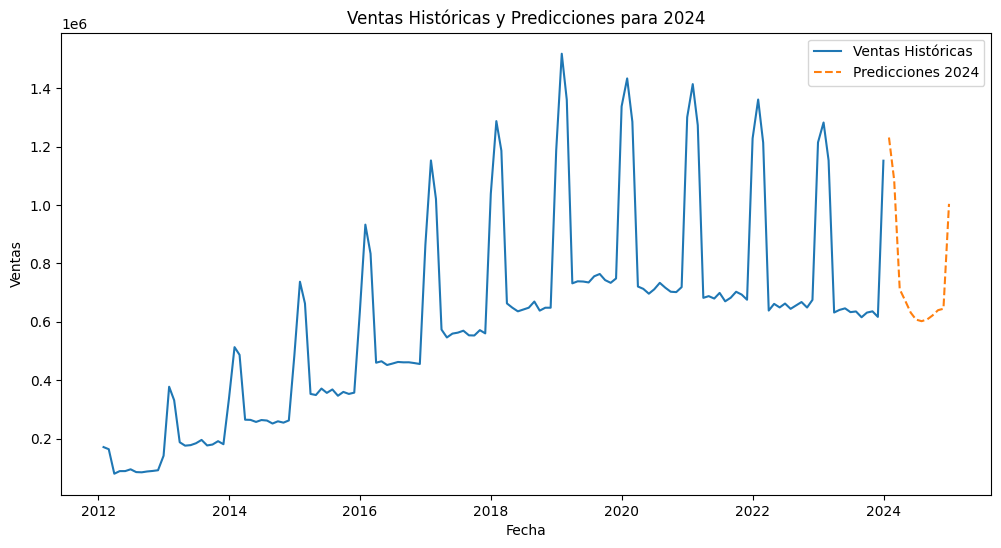

In [ ]:
df1['ds'] = pd.to_datetime(df1['ds'])
train['ds'] = pd.to_datetime(train['ds'])
plt.figure(figsize=(12, 6))

# Graficar los datos históricos
plt.plot(train['ds'], train['y'], label='Ventas Históricas')

# Graficar las predicciones
plt.plot(df1['ds'], df1['yhat'], label='Predicciones 2024', linestyle='--')

plt.title('Ventas Históricas y Predicciones para 2024')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


# 6- Funcionamiento del modelo en un entorno productivo

Para llevar el modelo a un entorno de producción se necesita realizar una
correcta integración tecnológica, automatización, monitoreo y mantenimiento continuo, así como asegurarse de que sea accesible e intuitiva la plataforma, donde los usuarios finales accederán al modelo y sus insights.

**1- Integración y Despliegue**

*   Integración con Sistemas Existentes:
> - El modelo debe integrarse con los sistemas de negocio actuales, como bases de datos de ventas, sistemas de planificación de recursos empresariales (ERP) y plataformas de análisis de datos.
> - Se deberían establecer procesos automatizados para extraer, transformar y cargar (ETL) los datos necesarios para las predicciones.
*   Automatización del Proceso de Predicción:
> Automatizar el proceso de generación de predicciones, de modo que el modelo se ejecute a intervalos regulares, en el caso actual de la distrubidora de forma mensual.
*   Despliegue del Modelo:
> Utilizar herramientas de contenedorización como Docker para desplegar el modelo en plataformas como AWS o Google Cloud.

**2- Monitoreo y Mantenimiento**

*   Monitoreo del Rendimiento del Modelo:
> Establecer un sistema de monitoreo para rastrear el rendimiento del modelo en tiempo real y alertar sobre cualquier degradación o problema a través de la monitorización de métricas clave como la precisión de las predicciones.
*   Actualización y Reentrenamiento:
> Implementar procesos para reentrenar el modelo periódicamente con nuevos datos para mantener su relevancia y precisión.
Automatizar el reentrenamiento o establecer un calendario regular, dependiendo de la naturaleza de los datos y del negocio.
*   Gestión de Cambios:
> Establecer un protocolo para la gestión de cambios cuando se actualice el modelo o se realicen ajustes en los datos de entrada o en la infraestructura.

Finalmente proporcionar una interfaz de usuario para que los stakeholders puedan **interactuar fácilmente con el modelo**, ver las predicciones y obtener insights.

# 7- Medición del Beneficio


* La reducción anual de pérdidas en las ventas, por el exceso de inventario con el modelo Prophet sería: 54.99%, equivalente a un ahorro anual de: $503111.

* La reducción anual de pérdidas en las ventas, por falta de inventario con el modelo Prophet sería: 80.7%, lo que se traduce en un aumento de $763139.09 de las ventas anuales

* Los beneficios anuales para la empresa distribuidora agrícola serían de:  $1266250.24

* Lo cuál dentro del promedio anual de ventas de los últimos 3 años de $9.69M representaría un aumento de los beneficios en un 13%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/combined_df.csv')
df.head(3)

,fecha,ventas,modelo_actual,pred_xgboost,pred_prophet
0,2021-01-31,1414162.0,9.945777e+05,1353075.20,1.317768e+06
1,2021-02-28,1273364.0,1.150227e+06,1282228.10,1.216842e+06
2,2021-03-31,682201.0,1.151661e+06,756129.94,8.134766e+05


### Costo de Error

In [ ]:
df['diff_modelo_actual'] = (df['modelo_actual']- df['ventas'])
df['diff_prophet'] = ( df['pred_prophet']-df['ventas'])
df.head(2)

,fecha,ventas,modelo_actual,pred_xgboost,pred_prophet,diff_modelo_actual,diff_prophet
0,2021-01-31,1414162.0,9.945777e+05,1353075.2,1.317768e+06,-419584.251013,-96394.201000
1,2021-02-28,1273364.0,1.150227e+06,1282228.1,1.216842e+06,-123136.606928,-56522.184132


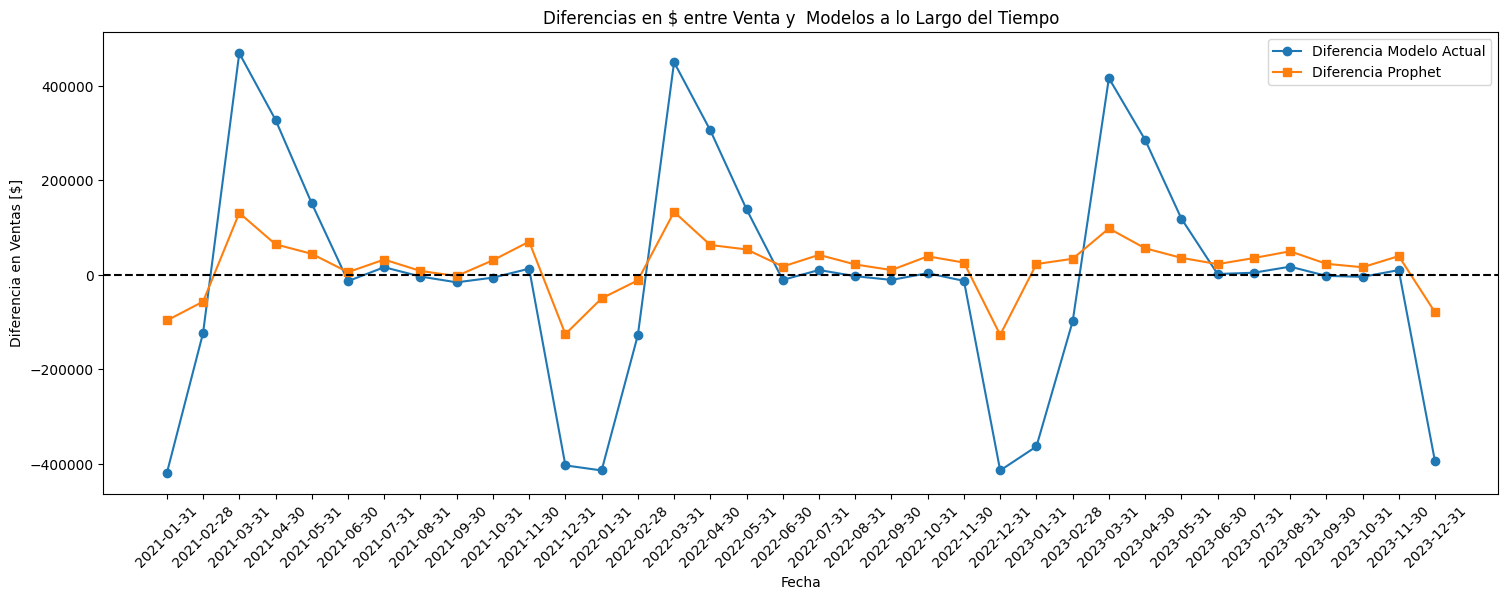

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df['fecha'], df['diff_modelo_actual'], label='Diferencia Modelo Actual', marker='o')
plt.plot(df['fecha'], df['diff_prophet'], label='Diferencia Prophet', marker='s')

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencias en $ entre Venta y  Modelos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en Ventas [$]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
sum_negativos_modelo_actual = round((df['diff_modelo_actual'].apply(lambda x: x if x < 0 else 0).sum())/3,2)
sum_positivos_modelo_actual = round((df['diff_modelo_actual'].apply(lambda x: x if x > 0 else 0).sum())/3,2)

sum_negativos_prophet = round((df['diff_prophet'].apply(lambda x: x if x < 0 else 0).sum())/3,2)
sum_positivos_prophet = round((df['diff_prophet'].apply(lambda x: x if x > 0 else 0).sum())/3,2)

sum_negativos_modelo_actual, sum_positivos_modelo_actual, sum_negativos_prophet, sum_positivos_prophet

(-945591.99, 914974.5, -182452.9, 411863.35)

In [ ]:
import pandas as pd
import plotly.express as px

resultados = {
    "Modelo": ["Modelo Actual", "Modelo Actual", "Prophet", "Prophet"],
    "Tipo": ["Falta de Inventario", "Exceso de Inventario", "Falta de Inventario", "Exceso de Inventario"],
    "Suma": [-945591.99, 914974.5, -182452.9, 411863.35]
}

df_resultados = pd.DataFrame(resultados)
df_resultados['Suma'] = df_resultados['Suma'].abs()

fig = px.bar(df_resultados, x="Modelo", y="Suma", color="Tipo", barmode="stack",
             title="Pérdidas Anuales en $ por Exceso y Falta de inventario",
             color_discrete_map={"Falta de Inventario": "blue", "Exceso de Inventario": "red"})
fig.show()


In [ ]:
red_pérdidas_ei = round((914974.5-411863.35)/914974.5*100,2)
print(f" La reducción anual de pérdidas en las ventas, por el exceso de inventario con el modelo Prophet sería: {red_pérdidas_ei}%, equivalente a un ahorro anual de: ${914974.5-411863.35}")

 La reducción anual de pérdidas en las ventas, por el exceso de inventario con el modelo Prophet sería: 54.99%, equivalente a un ahorro anual de: $503111.15


In [ ]:
red_pérdidas_fi = round((945591.99-182452.9)/945591.99*100,2)
print(f" La reducción anual de pérdidas en las ventas, por falta de inventario con el modelo Prophet sería: {red_pérdidas_fi}%, lo que se traduce en un aumento de ${945591.99-182452.9} de las ventas anuales")
print(f"Finalmente los beneficios anuales para la empresa distribuidora agrícola serían de: ${503111.15 + 945591.99-182452.9}")
print(f"Lo cuál dentro del promedio anual de ventas de los últimos 3 años de ${(10.09+9.7+9.28)/3}M representaría un aumento de los beneficios en un {1.26/((10.09+9.7+9.28)/3)*100}%")

 La reducción anual de pérdidas en las ventas, por falta de inventario con el modelo Prophet sería: 80.7%, lo que se traduce en un aumento de $763139.09 de las ventas anuales
Finalmente los beneficios anuales para la empresa distribuidora agrícola serían de: $1266250.2400000002
Lo cuál dentro del promedio anual de ventas de los últimos 3 años de $9.69M representaría un aumento de los beneficios en un 13.003095975232199%


# 8- Metodología para la Puesta en Producción


Una metodología para la implementación de modelos en producción es valiosa y necesaria porque garantiza una precisión continua a lo largo del tiempo, permite una respuesta rápida a cambios y problemas, mantiene la eficiencia operativa, asegura decisiones basadas en datos actualizados, y maximiza el retorno de inversión, alineando el modelo con los objetivos estratégicos de la empresa

1. **Monitoreo Continuo**

Métricas Clave de Rendimiento: Establecer métricas clave para evaluar la precisión del modelo, como el error medio absoluto, error cuadrático medio, y la precisión.
Detección de Deriva de Datos: Implementar herramientas para identificar cambios en los patrones de datos que podrían afectar el rendimiento del modelo.
Alertas Automatizadas: Configurar alertas para cambios significativos en el rendimiento o en los datos de entrada.

2. **Actualización y Mantenimiento**

Reentrenamiento Regular: Reentrenar el modelo con datos actualizados para mantener su relevancia y precisión.
Evaluación de Impacto: Medir regularmente el impacto del modelo en los objetivos comerciales, ajustándolo según sea necesario.
Gestión de Versiones: Mantener un control de versiones de los modelos para facilitar el seguimiento y la reversión si es necesario.

3. **Análisis de Retroalimentación**

Feedback del Usuario: Incorporar la retroalimentación de los usuarios finales y de los stakeholders para mejorar continuamente el modelo.
Ajustes Basados en el Negocio: Ajustar el modelo en función de los cambios en las necesidades o estrategias comerciales.

4. **Documentación y Cumplimiento**

Documentación Exhaustiva: Sería ideal documentar todo el proceso de desarrollo, despliegue y mantenimiento del modelo.

5. **Evaluación del Retorno de Inversión (ROI)**

Medición de ROI: Evaluar periódicamente el retorno de la inversión para asegurar de que el modelo contribuye  positivamente a los objetivos de la empresa.


Referencia: https://neptune.ai/blog/model-monitoring-for-time-series
